In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(pd.__version__)    
print(sns.__version__)    
print(np.__version__)    

1.4.4
0.12.0
1.23.3


In [ ]:
train_df=pd.read_csv("./dataframes/train.csv")
test_df=pd.read_csv("./dataframes/test.csv")
print(train_df.shape,test_df.shape)

In [ ]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.00,1,0,28664,21.0000,NaN,S
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.00,0,0,C 7076,7.2500,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.00,0,0,2627,14.4583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
287,288,0,3,"Naidenoff, Mr. Penko",male,22.00,0,0,349206,7.8958,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.00,1,0,244367,26.0000,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.00,0,0,349249,7.8958,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 칼럼(피쳐스, features)
- Survial 생존여부 0=No, 1=Yes
- Pclass 티켓 클래스 1=1st, 2=2nd, 3=3rd
- Sex 성별
- Age 나이
- SibSp 형제, 자매, 배우자가 배에 탄수
- Parch 부모, 자식이 배에 탄수
- ticket 티켓 번호
- fare 지불 금액
- cabin 객실 번호
- embarked 승선항 C=Cherbourg, Q= Queenstown, S=Southampton

### 범주형
- 명목형: Survived, Sex, Embarked
- 순서형: Pcalss
### 숫자형
- 연속형: Age, Fare
- 이산형: SipSp, Parch

### 혼합 데이터 유형
- Ticket
- Cabin
### 오류 또는 오타 있을 수 있는 데이터
- Name
### 빈값
- Cabin>Age>Embarked
### Object
- 5개의 칼럼
- 숫자형은 7개

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 수치 값의 분포
- 실제 탑승자(2,224명)의 40% 891명
- 35%정도 생존, 실제 생존율 38%
- 대부분 승객(75%)은 부모나 자녀와 함께 여행하지 않았다
- 승객의 30% 가까이가 형제,자매, 배우자 한명과 탑승했다
- 요금은 다양하게 지불
- 20~38세가 가장 많고 최고령은 80세

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 컬럼의 분포
- 이름은 전체에서 고유
- 남성이 65%
- 캐빈값은 중복이 되고 여러 명의 승객이 객실을 공유했다
- 세가지 항구에서 승객이 탑승했고, 대부분 승객이 S항에서 승선했다
- 티켓은 중복된 값이 22% 높다

In [ ]:
train_df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석을 기반으로 가정
#### 상관
 상관 관계 찾기
#### 완료(완성)
 1. Age는 상관관계가 높기 때문에 결측치를 처리해서 완성
 2. Embarked 결측치를 처리해서 완성
#### 수정
 1. Ticket 제외 될 수 있다
 2. Cabin 제외 될 수 있다
 3. PId 제외 될 수 있다
 4. Name 제외 될 수 있다
#### 생성
 1. Parch, SipSp 총 가족수로 변환
 2. Name 칼럼에서 Title 새 칼럼으로 추출 할 수 있다
 3. 나이(Age) 범위를 새롭게 칼럼으로 만들 수 있다
 4. 학습에 도움이 될 경우 요금(Fare) 범주형으로 만들수 있다
#### 분류
 1. 여성이 생존했을 가능성이 높다
 2. 어린이가 생존했을 가능성이 높다
 3. 상류층 승객이 더 생존했을 가능성이 높다

### 피봇 피쳐로 분석
 상관 관계를 신속하게 분석, 빈 값이 없는 피쳐에 대해 작업, 명목형(Sex), 순서형(Pclass), 이산형(SibSp,Parch)
 
 - **Pclass** 유의미한 상관관계가 있다. 피쳐를 우리 모델에 포함
 - **Sex** 여성의 생존율이 거의 74%
 - **SibSp, Parch** 상관관계가 별로 없다. 가족수라는 새로운 칼럼으로 도출해보자.

In [ ]:
train_df[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
train_df[["Sex","Survived"]].groupby(["Sex"]).mean()\
.sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
train_df[["SibSp","Survived"]].groupby(["SibSp"]).mean()\
.sort_values(by="Survived",ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
train_df[["Parch","Survived"]].groupby(["Parch"]).mean()\
.sort_values(by="Survived",ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


## 데이터를 시각화하여 분석
### 수치 특성의 상관 관계
수치 특성과 Survived 사이의 상관관계 이해
히스토그램 col-Survived, x-수치 특성

**관찰**
- 유아(나이<=5) 생존율이 높았다
- 80세 승객은 생존 했다
- 15-25세가 많은 수가 살아 남자 못했다
- 대부분 승객은 15세~35세 사이다

**결정 사항**
- 모델 훈련에서 나이를 고려 해 볼 수 있다.
- null값을 처리해서 나이를 완성해야 된다.
- 나이 범위 그룹으로 만들어야 된다.

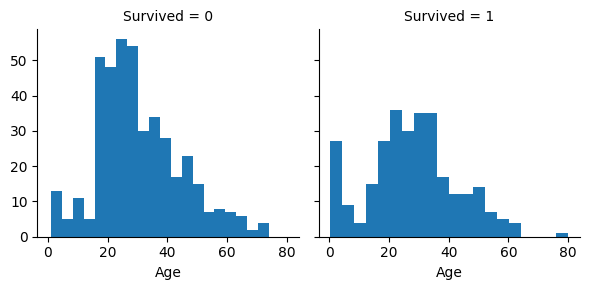

In [ ]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist, "Age",bins=20)

### 상관관계 확인: 명목형과 순서형의 피쳐들
Pclass 시각화

**관찰**
- Pclass=3 대부분의 승객, 대부분 살아 남지 못했다
- Pc=3,Pc=2,Pc=1 유아 승객이 생존 비율이 높았다
- Pc=1 승객 대부분은 생존
- Pclass는 승객 연령 분포가 다양하다

**결정 사항**
- 모델 학습을 위해 Pclass 고려한다

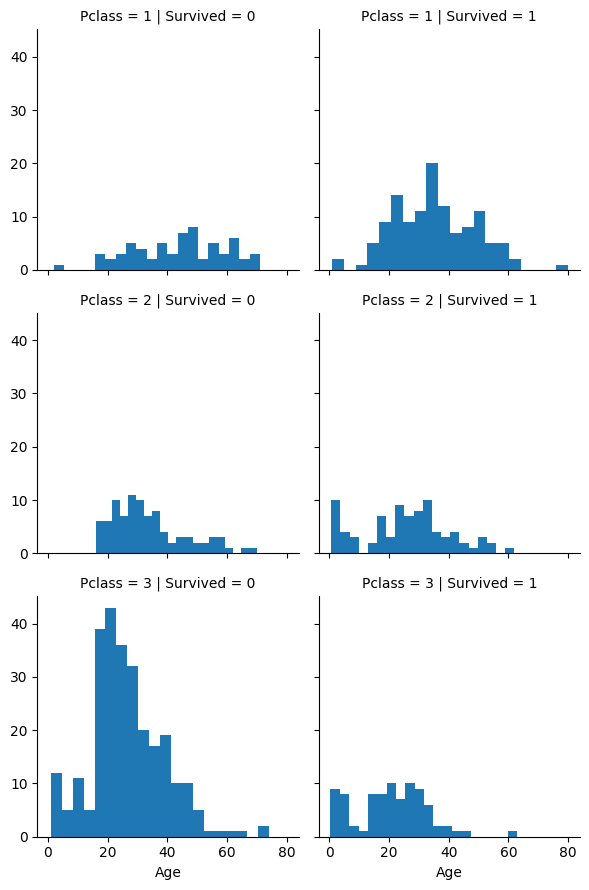

In [ ]:
g=sns.FacetGrid(train_df,col="Survived", row="Pclass")
g.map(plt.hist,"Age",bins=20)

## 범주형 피쳐 상관관계
승선항, 성별, 좌석등급에 대해 시각화

**관찰**
- 여성 승객이 남성 승객보다 생존율이 높다
- C 승선항은 남성이 더 생좀함. Pclass와 Embarked의 상관관계 일 수 있다.Pclass와 Survived와의 상관관계가 깊다.

**결정 사항**
- 모델 학습에서 성별 피쳐를 추가
- 모델 학습에서 승선항도 완성을 시켜서 추가

/home/lss/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/lss/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


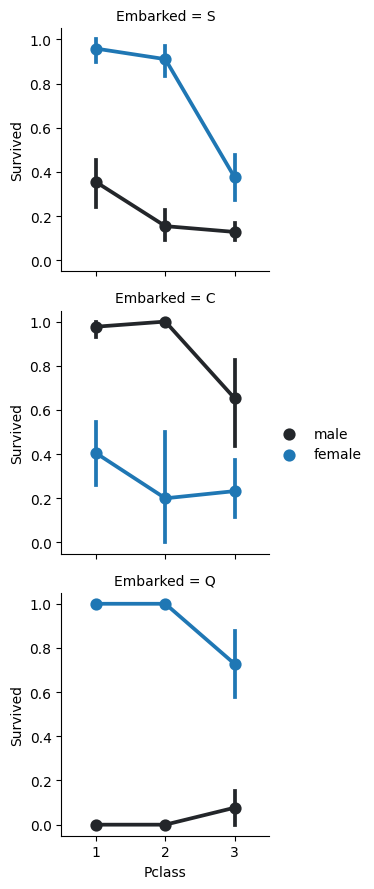

In [ ]:
g=sns.FacetGrid(train_df,row="Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()

### 범주형 및 숫자형 피쳐의 상관 관계
승선항, 성별, 요금, 생존 상관 관계를 고려

**관찰**
- 요금을 더 많이 낸 승객이 많이 생존 했다
- 승선 항구도 생존율과 상관 관계가 있다

**결정**
- 요금 범위를 만들어서 피쳐로 활용해 볼 수 있다
- 승선 항구도 피쳐로 활용 한다

/home/lss/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


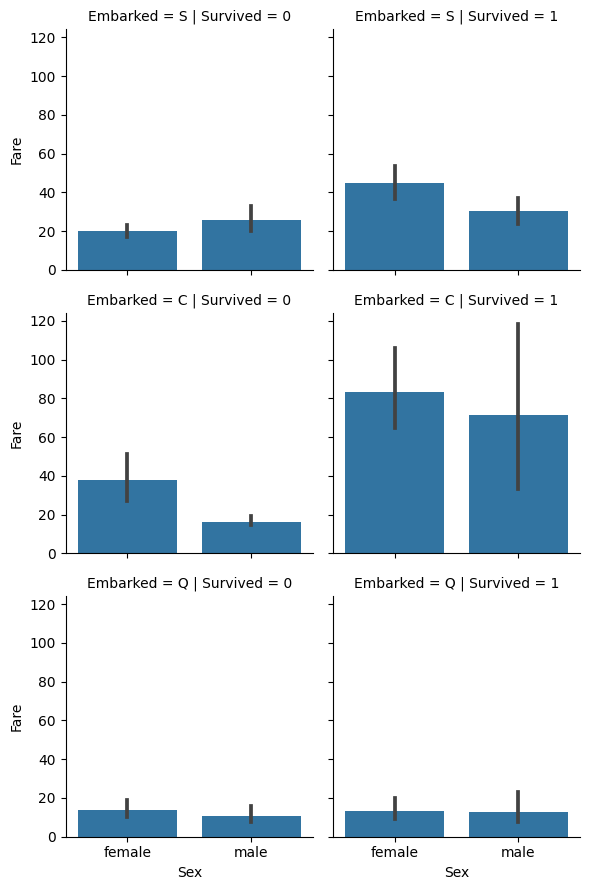

In [ ]:
g=sns.FacetGrid(train_df,row="Embarked", col="Survived")
g.map(sns.barplot,"Sex","Fare")

- 몇가지 가정과 결정을 수집
- 결정한 것을 수정, 생성 및 완료

### 피쳐를 삭제

(과대 적합-상관 관계가 없는 칼럼이나 표준편차에 벗어 나는 값들이 너무 많이 존재 하는 상태)

객실과 티켓 피쳐 삭제


In [ ]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [ ]:
print("Before", train_df.shape, test_df.shape)

# pop, drop->axis
train_df=train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)

combine=[train_df,test_df]

print("After",train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


### 기존 피쳐에서 추출하여 새 피쳐 작성
1. Name 피쳐(칼럼)에서 타이틀을 추출
2. PId 삭제

In [ ]:
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract(" ([A-Za-z]+)\.",expand=False)

pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
# 일반적인 타이틀로 수정
# 너무 적은 타이틀은 "희귀한" 변경
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(["Lady",
        "Countess","Capt","Col","Don","Dr","Major",
        "Rev","Sir","Jonkheer","Dona"],"Rare")
    dataset["Title"]=dataset["Title"].replace("Mlle","Miss")
    dataset["Title"]=dataset["Title"].replace("Ms","Miss")
    dataset["Title"]=dataset["Title"].replace("Mme","Mrs")

train_df[["Title","Survived"]].groupby(["Title"],
    as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
#범주형 문자열 타이틀을 순서형 숫자로 변환
title_mapping={"Mr":1,"Miss":2,"Master":4,"Rare":5}
for dataset in combine:
    dataset["Title"]=dataset["Title"].map(title_mapping)
    dataset["Title"]=dataset["Title"].fillna(0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,30.6958,C,1.0
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,13.0000,S,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1.0
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,8.0500,S,1.0
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,26.0000,S,0.0


In [ ]:
# 이름 피쳐 삭제
# 승객아이디 삭제
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape
# Run > Run All Cells

((891, 9), (418, 9))

In [ ]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
445,1,1,male,4.0,0,2,81.8583,S,4.0
422,0,3,male,29.0,0,0,7.8750,S,1.0
22,1,3,female,15.0,0,0,8.0292,Q,2.0
639,0,3,male,NaN,1,0,16.1000,S,1.0
746,0,3,male,16.0,1,1,20.2500,S,1.0


### 범주형 문자 피쳐 변환
문자열을 포함하는 피쳐를 숫자로 변환
성별 여성=1, 남성=0 변환

In [ ]:
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0}).astype(int)
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
121,0,3,0,NaN,0,0,8.05,S,1.0
242,0,2,0,29.0,0,0,10.50,S,1.0
191,0,2,0,19.0,0,0,13.00,S,1.0
501,0,3,1,21.0,0,0,7.75,Q,2.0
110,0,1,0,47.0,0,0,52.00,S,1.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


### 결측값 처리해서 완료
1. 너무 적을 때 삭제
2. 평균이나 최빈도수로 삽입
3. 평균과 표준편차 사이의 난수를 생성
4. 다른 피쳐들과의 상관관계를 찾아서 삽입
5. 위에 방법들을 조합해서 사용

In [ ]:
#결측치 확인
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64


In [ ]:
# 나이 PclassXGender
g=sns.FacetGrid(train_df, row="Pclass",col="Sex")
g.map(plt.hist,"Age")

In [27]:
#Pclass, Gender 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)&(dataset.Pclass==j+1),\
                "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [31]:
guess_ages

array([[41.22131148, 30.64814815, 26.35158501],
       [41.32      , 24.33333333, 23.04166667]])

In [32]:
dataset['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    21
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [33]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [34]:
# Age를 범위 밴드형으로 만들고 생존 상관 관계를 확인
# 예) 0~5세, 6~10세
# cut 데이터를 동일한 길이로 나눠줌
train_df["AgeBand"]=pd.cut(train_df["Age"],5)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],
    as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [35]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
67,0,3,0,19,0,0,8.1583,S,1.0,"(16.0, 32.0]"
573,1,3,1,21,0,0,7.7500,Q,2.0,"(16.0, 32.0]"
831,1,2,0,0,1,1,18.7500,S,4.0,"(-0.08, 16.0]"
489,1,3,0,9,1,1,15.9000,S,4.0,"(-0.08, 16.0]"
882,0,3,1,22,0,0,10.5167,S,2.0,"(16.0, 32.0]"


In [36]:
# Age를 서수로 대체
for dataset in combine:
    dataset.loc[dataset["Age"]<=16,"Age"]=0
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=32),"Age"]=1
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=48),"Age"]=2
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=64),"Age"]=3
    dataset.loc[(dataset["Age"]>64),"Age"]=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,0.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,0.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [37]:
# AgeBand는 삭제
train_df=train_df.drop(["AgeBand"],axis=1)
combine=[train_df,test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,1,0,0,13.00,S,5.0
887,1,1,1,1,0,0,30.00,S,2.0
888,0,3,1,1,1,2,23.45,S,2.0
889,1,1,0,1,0,0,30.00,C,1.0
890,0,3,0,1,0,0,7.75,Q,1.0


### 기존 피쳐를 결합한 새 피쳐 작성
Parch와 SibSp를 결합한 FamilySize라는 새로운 피쳐를 생성
이를 통해서 기존 피쳐는 삭제 가능

In [38]:
for dataset in combine:
    dataset["FamilySize"]=dataset["Parch"]+dataset["SibSp"]+1
train_df[["FamilySize","Survived"]].groupby(
    ["FamilySize"],as_index=False).mean()\
    .sort_values(by="Survived",ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
# 가족과 함께 탑승, 홀로 탑승
# IsAlone이라는 피쳐를 생성
for dataset in combine:
    dataset["IsAlone"]=0
    dataset.loc[dataset["FamilySize"]==1,"IsAlone"]=1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"]).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [40]:
# Parch, SibSp, FamilySize 삭제
train_df=train_df.drop(["Parch","SibSp","FamilySize"],axis=1)
test_df=test_df.drop(["Parch","SibSp","FamilySize"],axis=1)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,0
1,1,1,1,2,71.2833,C,0.0,0
2,1,3,1,1,7.9250,S,2.0,1
3,1,1,1,2,53.1000,S,0.0,0
4,0,3,0,2,8.0500,S,1.0,1


In [41]:
# Pclass*Age 새로운 피쳐를 생성
for dataset in combine:
    dataset["Age*Class"]=dataset["Age"]*dataset["Pclass"]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,S,1.0,0,3
1,1,1,1,2,71.2833,C,0.0,0,2
2,1,3,1,1,7.9250,S,2.0,1,3
3,1,1,1,2,53.1000,S,0.0,0,2
4,0,3,0,2,8.0500,S,1.0,1,6
5,0,3,0,1,8.4583,Q,1.0,1,3
6,0,1,0,3,51.8625,S,1.0,1,3
7,0,3,0,0,21.0750,S,4.0,0,0
8,1,3,1,1,11.1333,S,0.0,0,3
9,1,2,1,0,30.0708,C,0.0,0,0


### 범주형 피쳐 완성
승선항 결측치 처리
가장 흔한 값으로 채운다

In [42]:
#최빈값 mode()
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [43]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"])\
    .mean().sort_values(by="Survived",ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


### 변환: 카테고리형 피쳐를 숫자형으로
승선항을 숫자형으로 변환

In [44]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Title      891 non-null    float64
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    flo

(None, None)

In [45]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"]\
        .map({"S":0,"Q":1,"C":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,0,3
1,1,1,1,2,71.2833,2,0.0,0,2
2,1,3,1,1,7.9250,0,2.0,1,3
3,1,1,1,2,53.1000,0,0.0,0,2
4,0,3,0,2,8.0500,0,1.0,1,6


In [46]:
# 요금에서 결측치
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [48]:
# 요금의 표준편차 중앙값으로 삽입
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [ ]:
# FareBand 피쳐 생성
# cut - 길이를 기준으로 등분
# qcut - 양을 기준으로 등분
train_df["FareBand"]=pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"])\
         .mean().sort_values(by="FareBand", ascending=True)

In [ ]:
# 요금 밴드를 기준으로 요금 피쳐를 서수값으로 대체
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91)\
                &(dataset["Fare"]<=14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454)\
                &(dataset["Fare"]<=31.0),"Fare"]=2
    dataset.loc[(dataset["Fare"]>31.0)\
                &(dataset["Fare"]<=512.329),"Fare"]=3

train_df=train_df.drop(["FareBand"],axis=1)
combine=[train_df,test_df]

train_df.sample(10)

In [ ]:
# test_df 확인
test_df.sample(10)

### 모델링, 예측 및 결과
- 텐서플로우, 파이토치: 팁러닝 프레임워크
- 케라스: 텐서플로우 2.0의 고성능 API
- 사이킷런: 머신러닝용 프레임워크

In [ ]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
# 로지스틱 레그레이션
# 렐루, 시그모이드
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

In [ ]:
#서포트 벡터 머신
#분류 알고리즘
#이진 데이터를 분류할 때 가장 좋은 성능
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

In [ ]:
# k-NN 분류와 회귀
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

In [ ]:
# 나이브 베이지안
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

In [ ]:
#퍼셉트론
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

In [ ]:
# LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_train,Y_train)*100,2)
acc_linear_svc

In [ ]:
# 확률적 경사 하강법(Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

In [ ]:
# 결정 트리(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=\
    round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

In [ ]:
# 랜덤 포레스트(Random Forest)
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=\
    round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

In [ ]:
#모델에 대한 평가 순위를 매겨서 도출
models=pd.DataFrame({
    "Model":["SVM","KNN","Logistic Regression",
             "Random Forest","Naive Bayes","Perceptron",
             "SGD","L-SVC","Decision Tree"
            ],
    "Score":[
                acc_svc,acc_knn,acc_log,acc_random_forest,
                acc_gaussian, acc_perceptron, acc_sgd,
                acc_linear_svc,acc_decision_tree
            ]
    })
models.sort_values(by="Score", ascending=False)

### 모델 결정
 - 결정 트리는 교육 세트에 과적합하는 단점
 - 랜덤 포레스트 모델을 사용하기로 함

In [ ]:
submission=pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":Y_pred
})
submission.head()

In [ ]:
submission.to_csv("submission.csv",index=False)